In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline
from collections import Counter
import ast
import datetime
import pickle

In [330]:
train_df=pd.read_csv(r"train.csv")
test_df=pd.read_csv(r"test.csv")

In [3]:
train_df.shape,test_df.shape

((3000, 23), (4398, 22))

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [5]:
train_df.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

In [7]:
test_df.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482241,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


Number of missing values

In [8]:
train_df.isna().sum().sort_values(ascending=False)

belongs_to_collection    2396
homepage                 2054
tagline                   597
Keywords                  276
production_companies      156
production_countries       55
spoken_languages           20
crew                       16
cast                       13
overview                    8
genres                      7
runtime                     2
poster_path                 1
original_language           0
budget                      0
imdb_id                     0
revenue                     0
original_title              0
popularity                  0
release_date                0
status                      0
title                       0
id                          0
dtype: int64

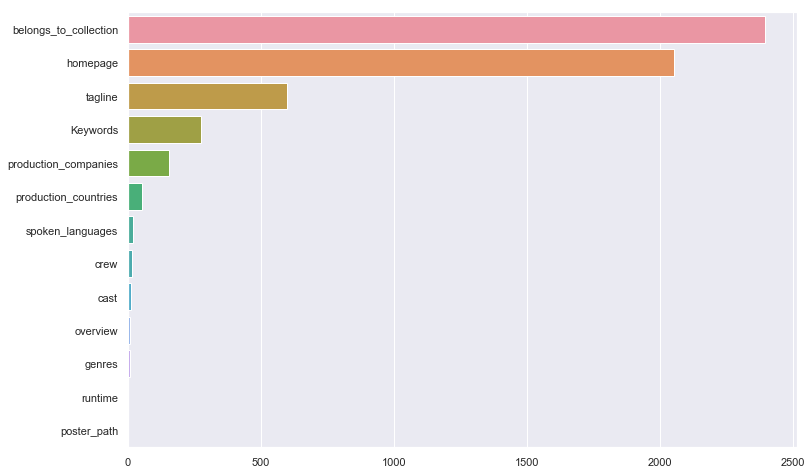

In [9]:
missing_train=train_df.isna().sum().sort_values(ascending=False)
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(missing_train.loc[:"poster_path"],missing_train.loc[:"poster_path"].index);

So, there are a couple of missing value which needed to be operated. Going through the datset we can find many columns that are string inside which there is a list and inside that their is a dictionary. So we need to convert those columns from string to dictionary

In [10]:
str_columns=["belongs_to_collection","genres","production_companies","production_countries","cast","crew"]

def str_to_dict(data):
    for col in str_columns:
        data[col]=data[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [11]:
str_to_dict(train_df)
str_to_dict(test_df)

Now we will deal with all the column one by one and see what these are referring to.

1. Belongs_to_collection 

In [12]:
train_df["belongs_to_collection"].apply(lambda x : 1 if x!={} else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

The above results shows that there are 604 movies that have a prequel. Now lets see which movies has a maximum number of prequels.

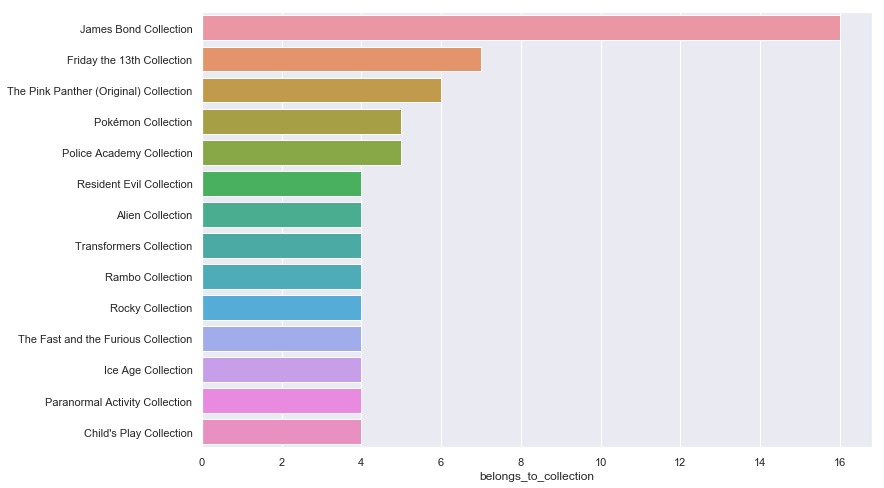

In [13]:
movie_coll=train_df["belongs_to_collection"].apply(lambda x: x[0]["name"] if x!={} else 0).value_counts()[1:15]
sns.barplot(movie_coll,movie_coll.index);

James Bond collection consists of total 16 number of movies followed by Friday the 13th and so on.

2. Genre

We will look for the most common genre that is present in the movies.

In [14]:
genre_df=train_df.genres.apply(lambda x: [i["name"] for i in x] if x!= {} else [])

In [15]:
count=Counter([k for gen in genre_df for k in gen]).most_common(10)

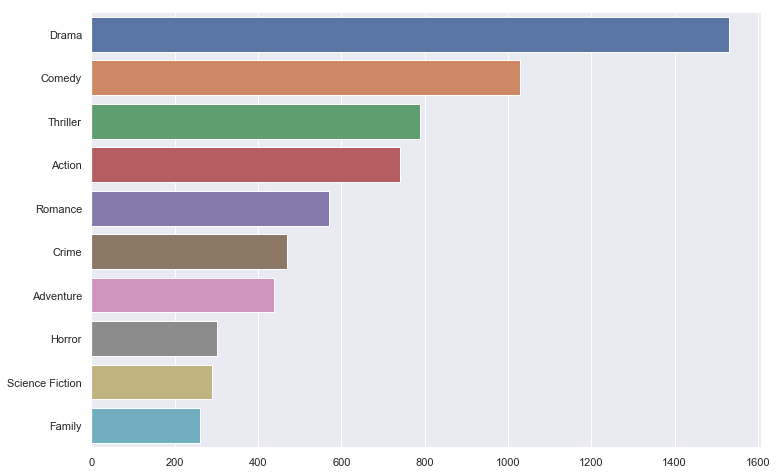

In [16]:
sns.barplot([value[1] for value in count],[key[0] for key in count]);

3. Production companies

In [17]:
production_df=train_df["production_companies"].apply(lambda x:[i["name"] for i in x] if x!={} else [])

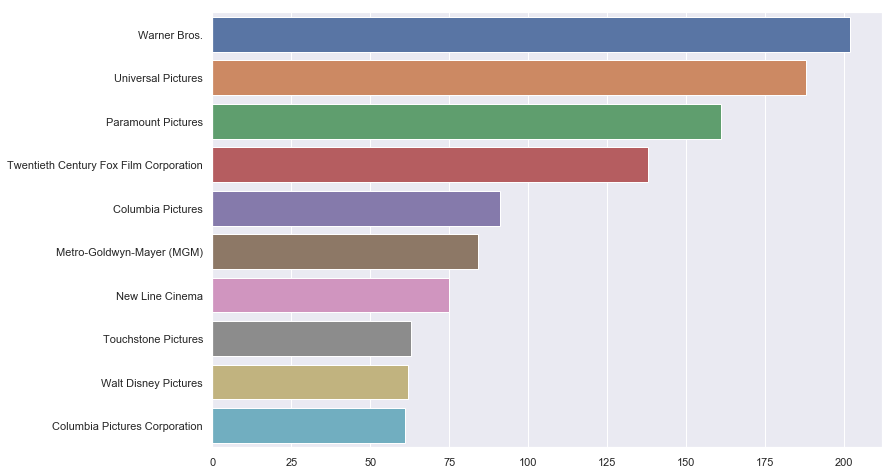

In [18]:
production_count=Counter([i for name in production_df for i in name]).most_common(10)
sns.barplot([i[1] for i in production_count],[i[0] for i in production_count])

4. Production countries

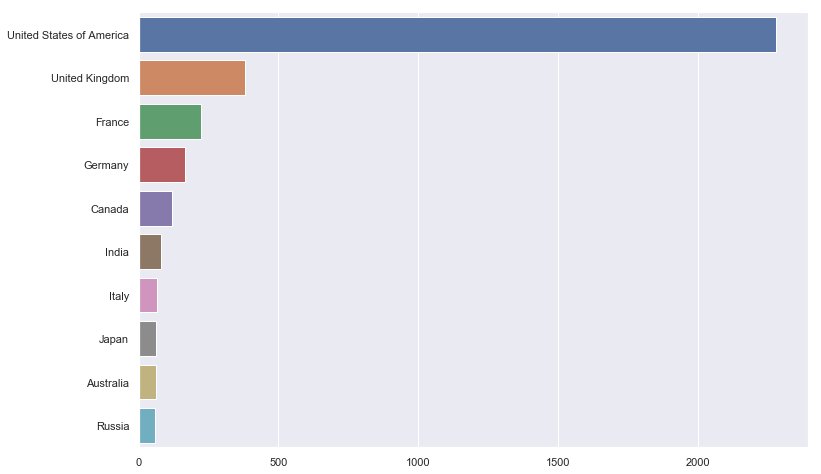

In [19]:
countries_df=train_df["production_countries"].apply(lambda x:[i["name"] for i in x] if x!={} else [])
countries_count=Counter([i for name in countries_df for i in name]).most_common(10)
sns.barplot([i[1] for i in countries_count],[i[0] for i in countries_count]);

5.Cast

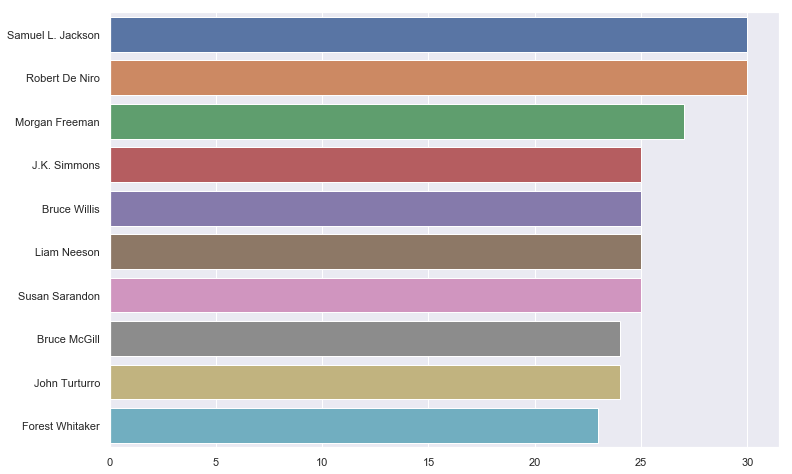

In [20]:
cast_name_df=train_df["cast"].apply(lambda x:[i["name"] for i in x] if x!={} else [])
cast_count=Counter([i for name in cast_name_df for i in name]).most_common(10)
sns.barplot([i[1] for i in cast_count],[i[0] for i in cast_count]);

Checking number of male and female actors. The dataset cast has gender classification with three class. So we will drop the gender class 0 as it has both male and female actress. Hence we will count only male as 2 and female as 1.

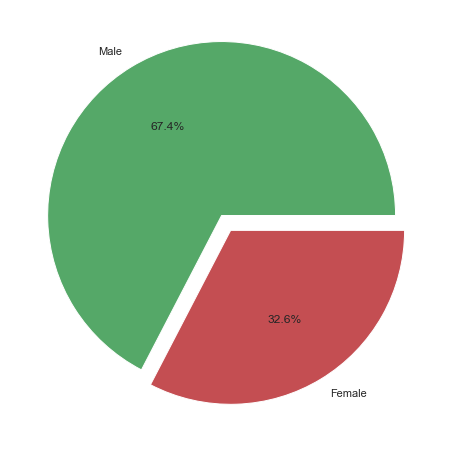

In [21]:
cast_gender_df=train_df["cast"].apply(lambda x:[i["gender"] for i in x] if x!={} else [])
gender_count=Counter([i for j in cast_gender_df for i in j]).most_common(10)
del gender_count[1]
plt.pie([gender_count[0][1],gender_count[1][1]],labels=["Male","Female"],colors="green",explode=(0.1,0),autopct="%1.1f%%");

Checking for top male and female actors

In [22]:
#Adding male actors in male list and demale in female list
male=[]
female=[]
for i in range(0,len(cast_gender_df)):
    for j in range(0,len(cast_gender_df[i])):
        if cast_gender_df[i][j]==2:
            male.append(cast_name_df[i][j])
        elif cast_gender_df[i][j]==1:
            female.append(cast_name_df[i][j])
        else:
            pass

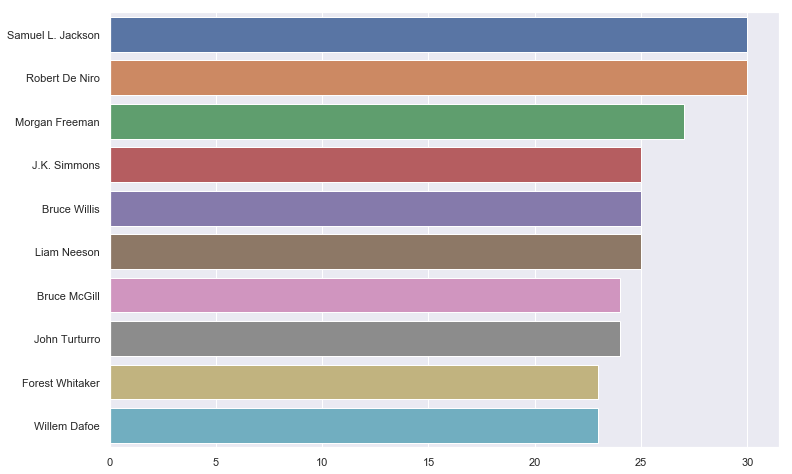

In [23]:
male_gender_count=Counter(male).most_common(10)
sns.barplot([i[1] for i in male_gender_count],[i[0] for i in male_gender_count]);

Actress who have made most of the appearance.

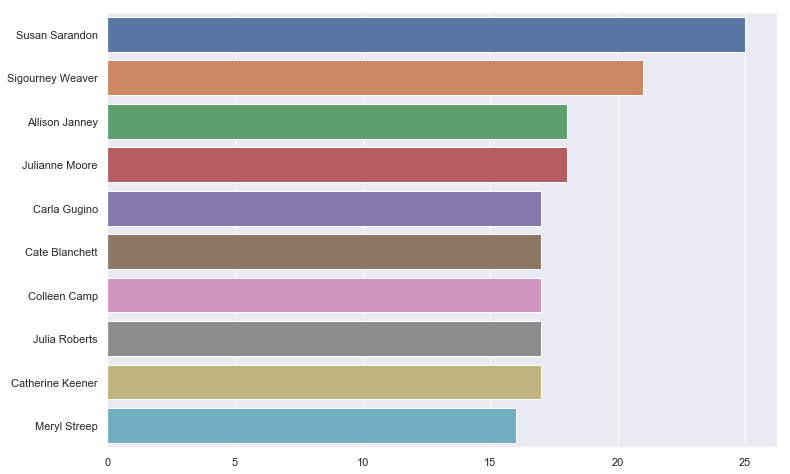

In [24]:
female_gender_count=Counter(female).most_common(10)
sns.barplot([i[1] for i in female_gender_count],[i[0] for i in female_gender_count]);

Movies with most cast members

In [25]:
cast_numbers_dict={}
for i in range(0,len(cast_name_df)):
    cast_numbers_dict[train_df["title"][i]]=len(cast_name_df[i])

In [26]:
import operator
cast_numbers_dict_sorted = sorted(cast_numbers_dict.items(), key=operator.itemgetter(1),reverse=True)
cast_numbers_dict_slice=cast_numbers_dict_sorted[:20]

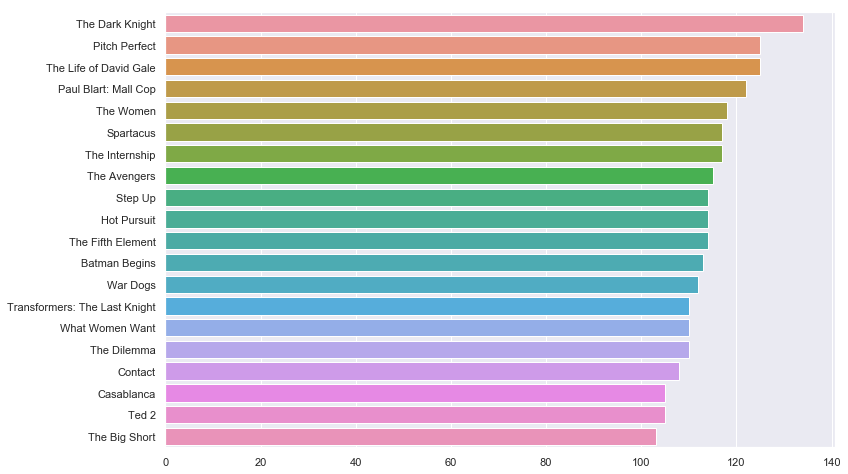

In [27]:
sns.barplot([i[1] for i in cast_numbers_dict_slice],[i[0] for i in cast_numbers_dict_slice]);

Movies with most male actors

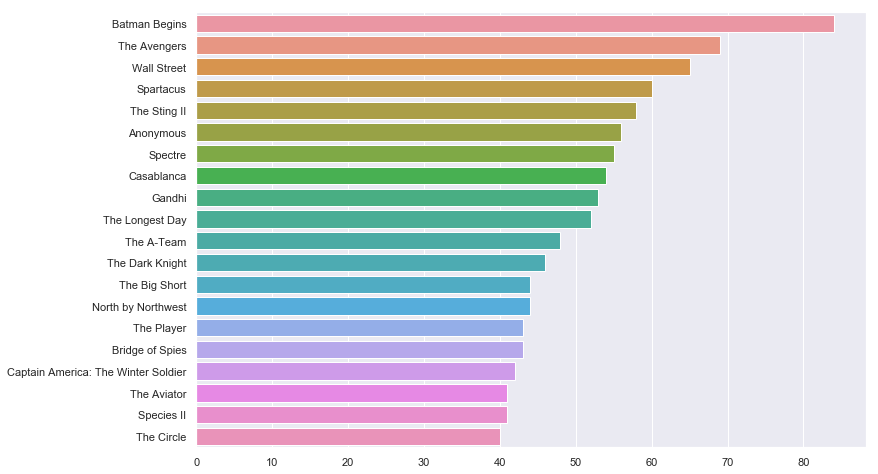

In [28]:
male_number={}
for i in range(0,len(cast_gender_df)):
    male_number[train_df["title"][i]]=cast_gender_df[i].count(2)
male_number_sorted=sorted(male_number.items(),key=operator.itemgetter(1),reverse=True)[:20]
sns.barplot([i[1] for i in male_number_sorted],[i[0] for i in male_number_sorted]);

Movies with most actress

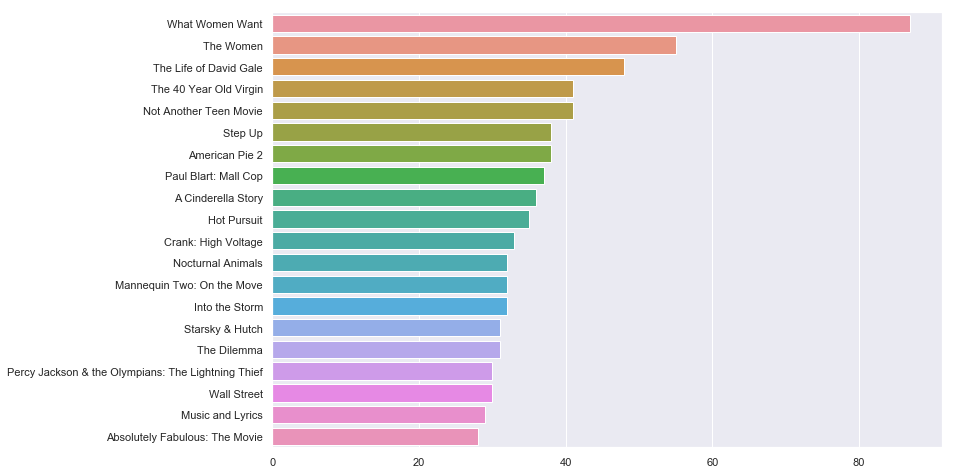

In [29]:
female_number={}
for i in range(0,len(cast_gender_df)):
    female_number[train_df["title"][i]]=cast_gender_df[i].count(1)
female_number_sorted=sorted(female_number.items(),key=operator.itemgetter(1),reverse=True)[:20]
sns.barplot([i[1] for i in female_number_sorted],[i[0] for i in female_number_sorted]);

6 CREW

In [30]:
director_names=[]
for i in train_df["crew"]:
    for j in range(0,len(i)):
        if i[j]["job"]=="Director":
            director_names.append(i[j]["name"])

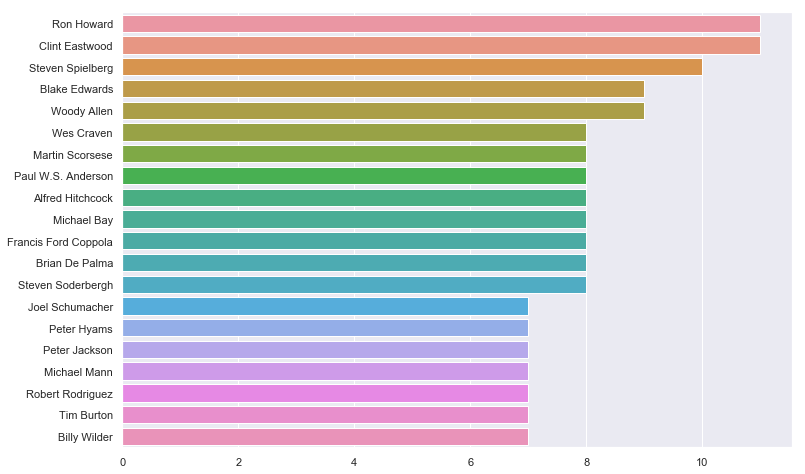

In [31]:
director_count=Counter(director_names).most_common(20)
sns.barplot([i[1] for i in director_count],[i[0] for i in director_count]);

7. BUDGET

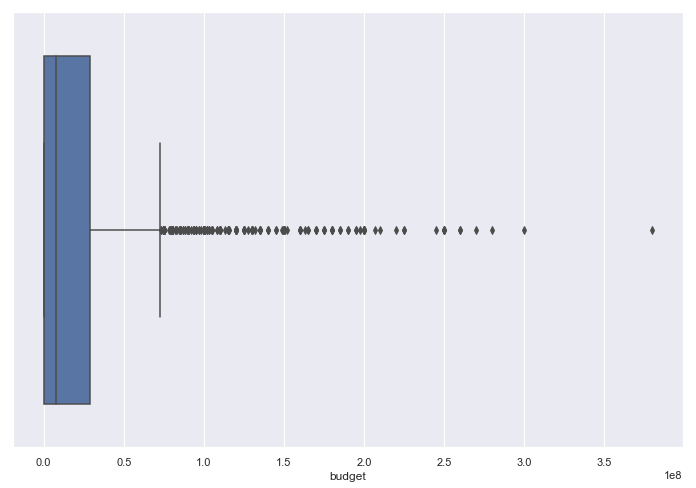

In [32]:
sns.boxplot(train_df["budget"]);

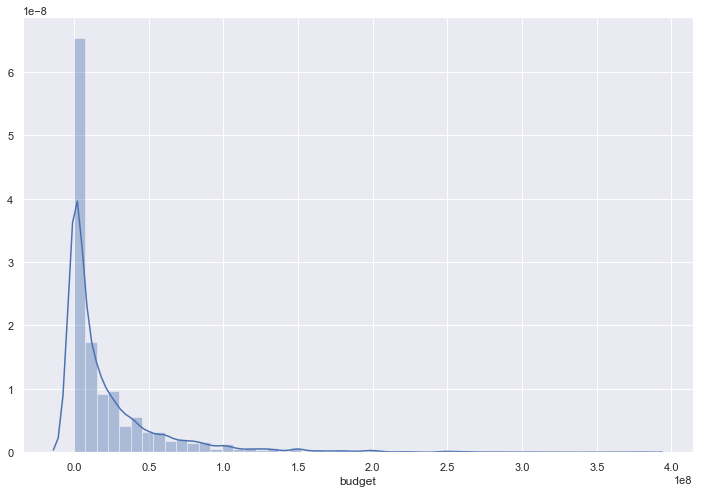

In [33]:
sns.distplot(train_df["budget"],);
#Seems quite skewed and a lot of value equals to 0.

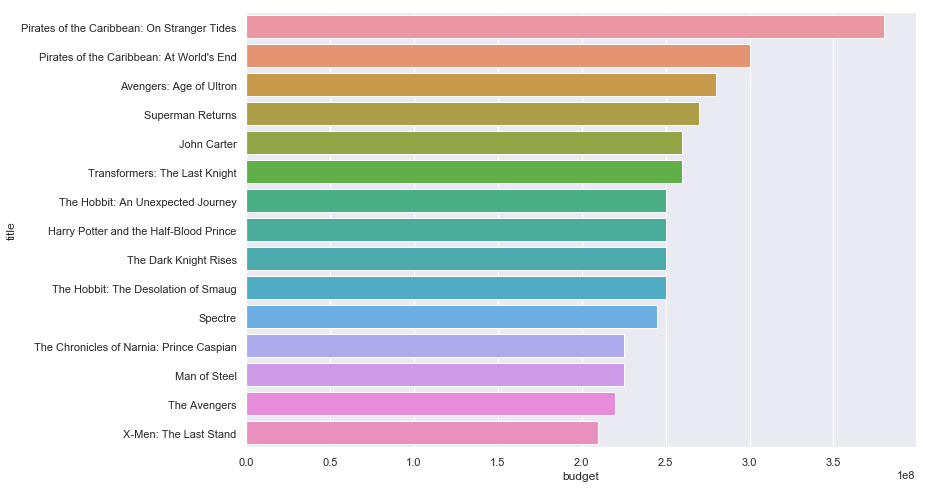

In [34]:
#Top 15 movies with maximum budget
budget_df=train_df.sort_values("budget",ascending=False)[["id","budget","title"]][:15]
sns.barplot(budget_df["budget"],budget_df["title"]);

8. RUNTIME

In [35]:
train_df.fillna(train_df["runtime"].mean(),inplace=True)

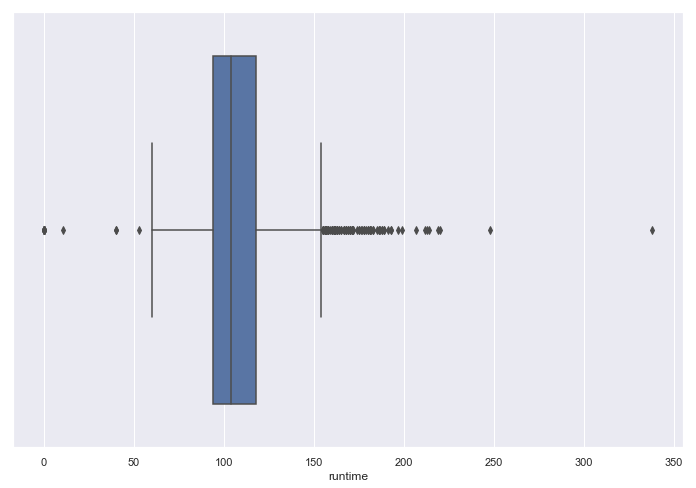

In [36]:
sns.boxplot(train_df["runtime"]);

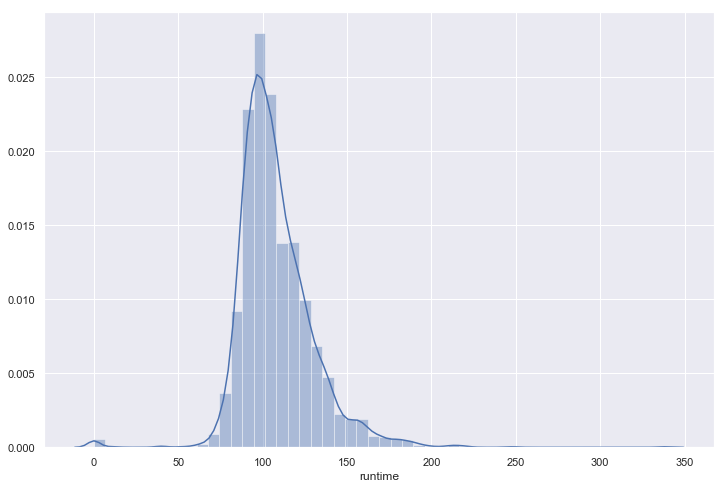

In [37]:
sns.distplot(train_df["runtime"]);
#Perfect distribution

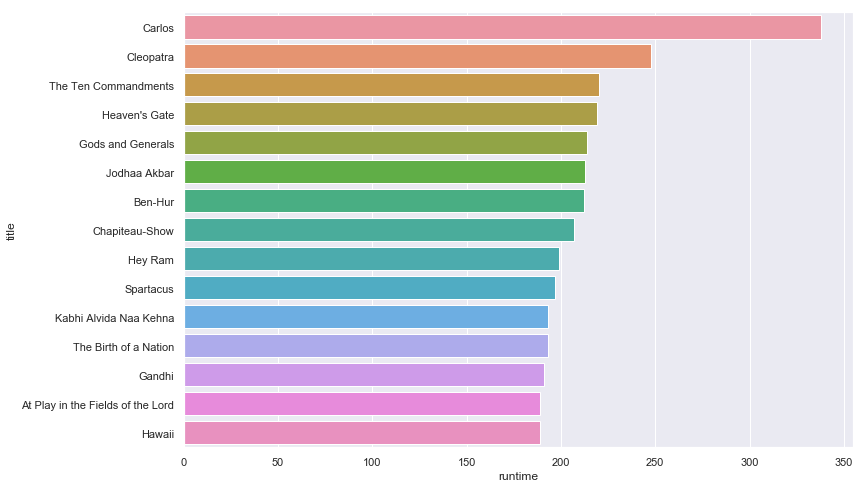

In [38]:
#Top 15 longest running movies
runtime_df=train_df.sort_values("runtime",ascending=False)[["id","runtime","title"]][:15]
sns.barplot(runtime_df["runtime"],runtime_df["title"]);

9. REVENUE

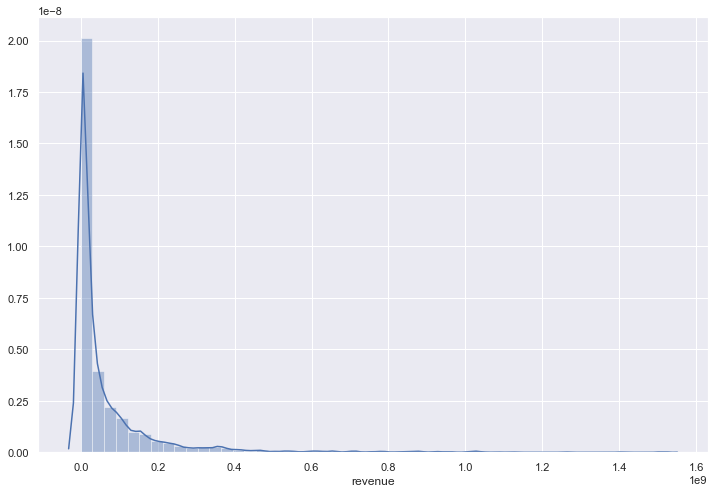

In [39]:
sns.distplot(train_df["revenue"]);

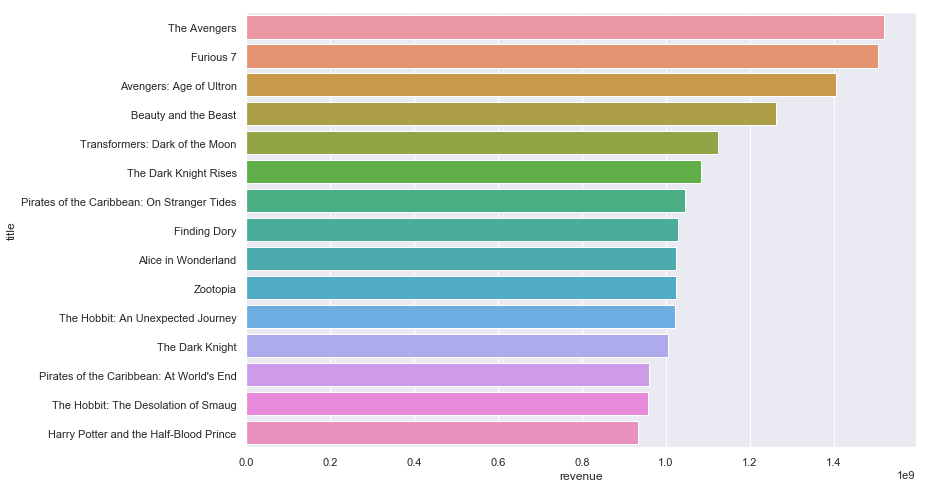

In [40]:
#Top 15 most earning movies
revenue_df=train_df.sort_values("revenue",ascending=False)[["id","revenue","title"]][:15]
sns.barplot(revenue_df["revenue"],revenue_df["title"]);

10. POPULARITY

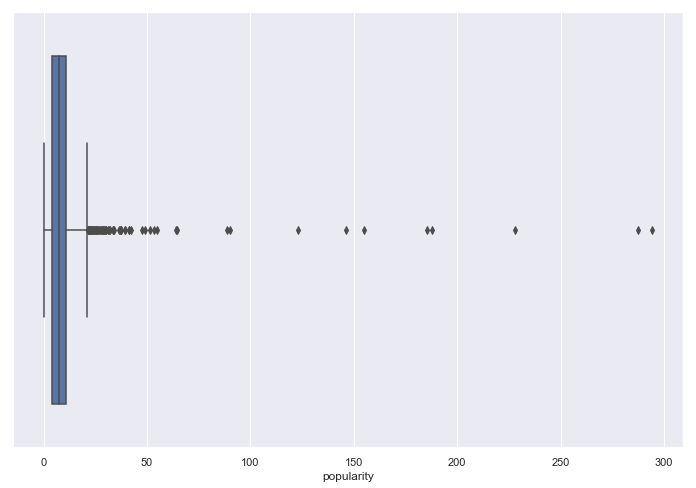

In [41]:
sns.boxplot(train_df["popularity"]);

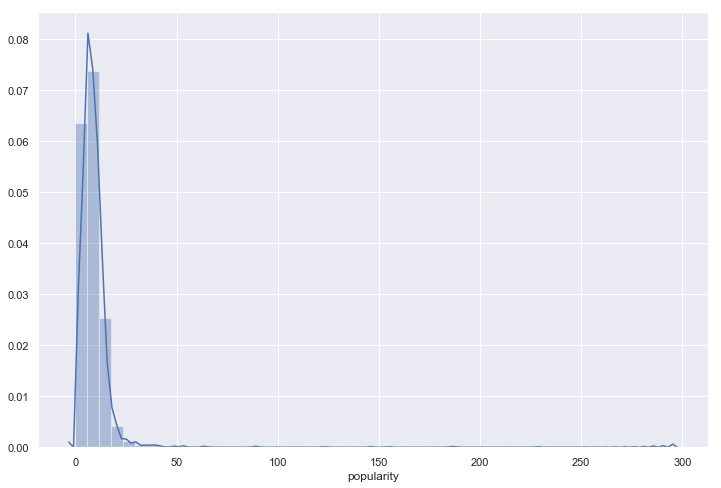

In [42]:
sns.distplot(train_df["popularity"]);
#Highly skewed

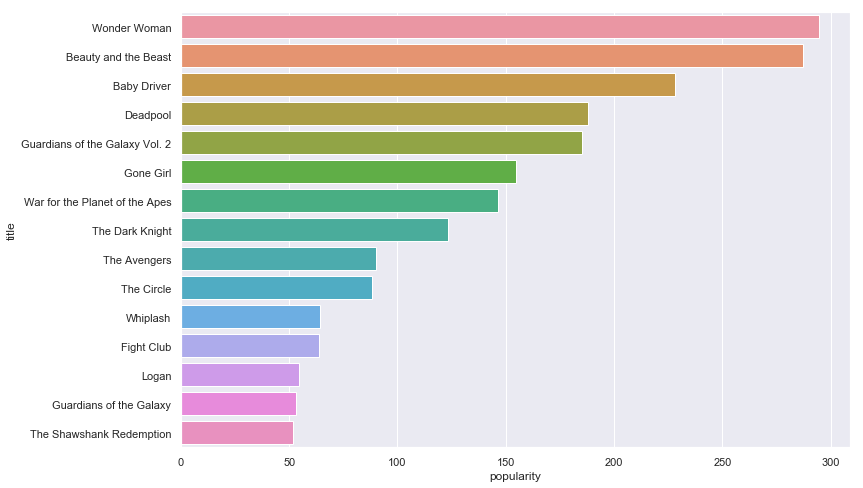

In [43]:
#Top 15 most popular movies
popular_df=train_df.sort_values("popularity",ascending=False)[["id","popularity","title"]][:15]
sns.barplot(popular_df["popularity"],popular_df["title"]);

Done with single columns, now let see how does the budget and runtime parameters effect our target variable.

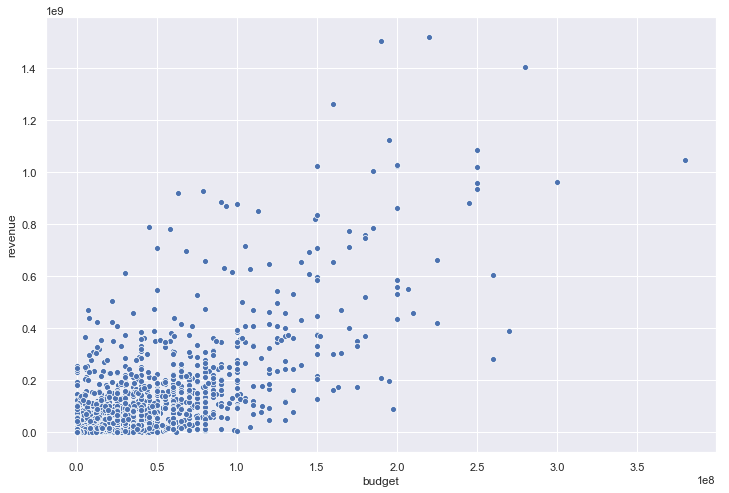

In [44]:
sns.scatterplot(train_df["budget"],train_df["revenue"]);

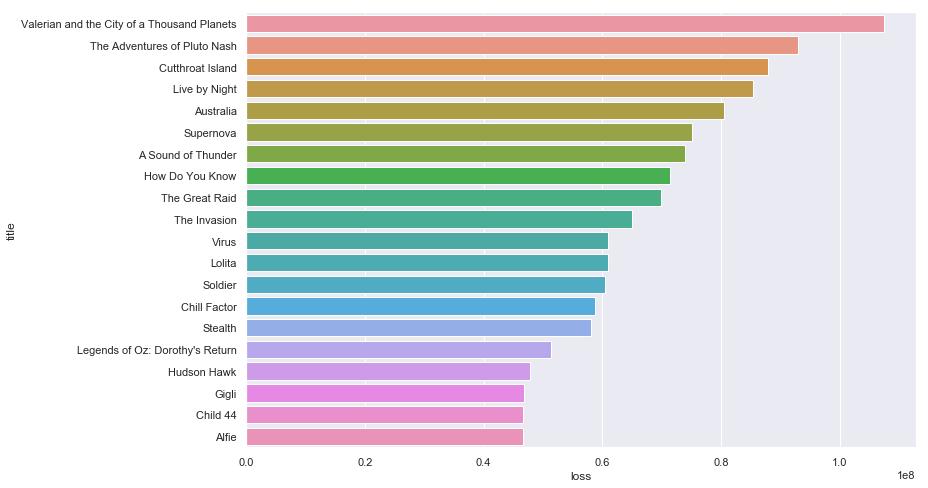

In [45]:
#Let's see for the biggest flop movies whose budget was a lot but was not able to do good at the box office.
flop_movies=train_df[train_df["budget"]> train_df["revenue"]][["budget","revenue","title"]]
flop_movies["loss"]=flop_movies["budget"]-flop_movies["revenue"]
flop_movies_sort=flop_movies.sort_values("loss",ascending=False)[["title","loss"]].head(20)
sns.barplot(flop_movies_sort["loss"],flop_movies_sort["title"]);

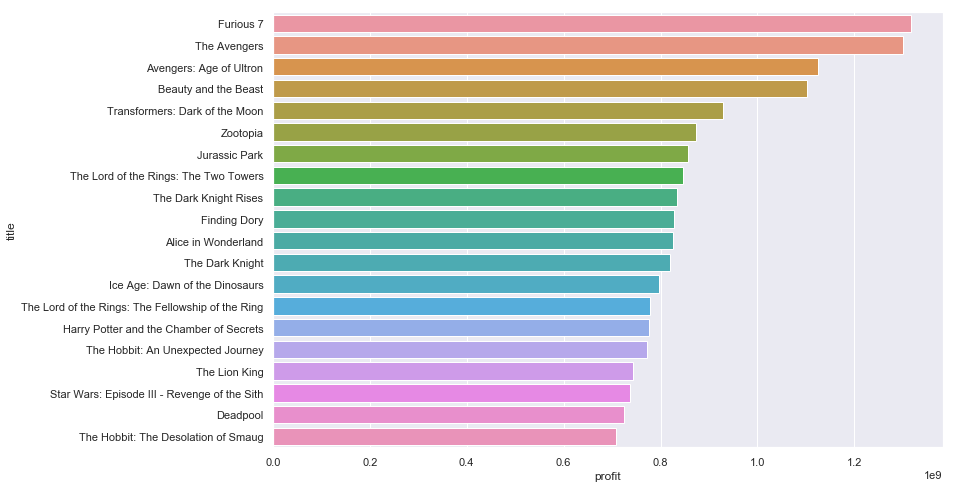

In [46]:
#Let's see for the biggest hit movies whose revenue were way more than the budget
hit_movies=train_df[train_df["budget"]< train_df["revenue"]][["budget","revenue","title"]]
hit_movies["profit"]=hit_movies["revenue"]-hit_movies["budget"]
hit_movies_sort=hit_movies.sort_values("profit",ascending=False)[["title","profit"]].head(20)
sns.barplot(hit_movies_sort["profit"],hit_movies_sort["title"]);

Well ignoring the errors of 0 min runtime as the datapoints are less.

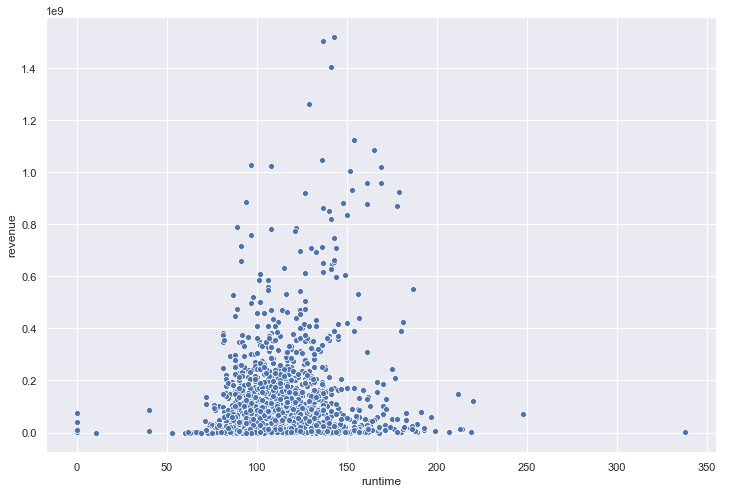

In [47]:
sns.scatterplot(train_df["runtime"],train_df["revenue"]);

In [48]:
#Well there is a movie with more than 5 hrs and very low revenue lets see which was it
train_df[train_df["runtime"]>300]["title"]

1211    Carlos
Name: title, dtype: object

In [49]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

Enough for the EDA part. We saw which movies did good and which movies were bad. Which were the most popular actors or actresses. Some flop movies and some great movies. More insights can be derived from this particuar dataset and new stories can be written from it. However we will move forward to predict the revenue of the testing movie datas and then build a recommendation model.

# FEATURE ENGINEERING

Since the dataset is quite messy and we need to process the datset first. Along with cleaning the data we will also use feature engineering to develop new outputs from the dataset. To ease in processing the data we will merge the training and testing dataset.

In [50]:
to_drop=["id","imdb_id","original_title"]

In [51]:
def drop_col(data):
    data.drop(to_drop,axis=1,inplace=True)

In [52]:
drop_col(train_df)
drop_col(test_df)

Operating columns one by one

In [53]:
def multiple(data):
    data["mutiple_parts"]=np.where(data["belongs_to_collection"]=={},"no","yes")

In [54]:
multiple(train_df)
multiple(test_df)

***************************************************************************************************************************

In [55]:
#Budget column was highly skewed.
train_df["budget"].skew(),test_df.budget.skew()

(3.1035303484688876, 2.7480336184462675)

In [56]:
def remove_skewness(data,col):
    data["skew"+"_"+col]=np.log1p(data[col])

In [57]:
remove_skewness(train_df,"budget")
remove_skewness(test_df,"budget")

*****************************************************************************************************************************

In [58]:
#Extracting genres from json format to list.
def name_extractor(data,col,para):
    data["new_"+col]=data[col].apply(lambda x:[i[para] for i in x] if isinstance(x,list) else [])

In [59]:
name_extractor(train_df,"genres","name")
name_extractor(test_df,"genres","name")

******************************************************************************************************************************

In [60]:
#Extracting production companies names
name_extractor(train_df,"production_companies","name")
name_extractor(test_df,"production_companies","name")

In [61]:
#Extracting production countries names
name_extractor(train_df,"production_countries","name")
name_extractor(test_df,"production_countries","name")

In [62]:
train_df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'revenue', 'mutiple_parts', 'skew_budget', 'new_genres',
       'new_production_companies', 'new_production_countries'],
      dtype='object')

In [69]:
#Saving training data

train="train"
outfile=open(train,"wb")
pickle.dump(train_df,outfile)
outfile.close()

In [70]:
#Saving testing data

test="test"
outfile=open(test,"wb")
pickle.dump(test_df,outfile)
outfile.close()

In [71]:
pickle_in=open("train","rb")
df_train=pickle.load(pickle_in)

In [72]:
pickle_in=open("test","rb")
df_test=pickle.load(pickle_in)

In [73]:
df_train.shape,df_test.shape

((3000, 25), (4398, 24))

In [78]:
#Converting series to date time
def datetime(data,col):
    data[col]=pd.to_datetime(data[col])

In [81]:
datetime(df_train,"release_date")
datetime(df_test,"release_date")

In [82]:
class time_fe:
    
    def __init__(self,data,col):
        self.data=data
        self.col=col
        
    def year_fe(self):
        a=[]
        for i in range(0,len(self.data)):
            y=self.data[self.col][i].year
            a.append(y)
        self.data["years"]=pd.Series(a)

    def month_fe(self):
        a=[]
        for i in range(0,len(self.data)):
            y=self.data[self.col][i].month
            a.append(y)
        self.data["months"]=pd.Series(a)

    def day_fe(self):
        a=[]
        for i in range(0,len(self.data)):
            y=self.data[self.col][i].day
            a.append(y)
        self.data["day"]=pd.Series(a)
        
    def quarter_fe(self):
        a=[]
        for i in range(0,len(self.data)):
            y=self.data[self.col][i].quarter
            a.append(y)
        self.data["quarter"]=pd.Series(a)
        
    def week_fe(self):
        a=[]
        for i in range(0,len(self.data)):
            y=self.data[self.col][i].week
            a.append(y)
        self.data["week"]=pd.Series(a)
        
    def day_year(self):
        a=[]
        for i in range(0,len(self.data)):
            y=self.data[self.col][i].dayofyear
            a.append(y)
        self.data["dayofyear"]=pd.Series(a)
        
    def total_days(self):
        a=[]
        tud=datetime.date.today()
        for i in range(0,len(self.data)):
            y=tud-self.data[self.col][i].date()
            a.append(y.days)
        self.data["total_day"]=pd.Series(a)

In [83]:
time=time_fe(df_train,"release_date")

In [84]:
li=[]
for method in dir(time):
    if method.startswith("_"):
        pass
    else:
        if callable(getattr(time,method))==True:
            li.append(method)
        else:
            pass       

In [90]:
for method in li:
    getattr(time,method)()

In [91]:
df_train.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'revenue', 'mutiple_parts', 'skew_budget', 'new_genres',
       'new_production_companies', 'new_production_countries', 'day',
       'dayofyear', 'months', 'quarter', 'total_day', 'week', 'years'],
      dtype='object')

In [92]:
time=time_fe(df_test,"release_date")

In [93]:
df_test.release_date=pd.to_datetime(df_test["release_date"])

In [94]:
li=[]
for method in dir(time):
    if method.startswith("_"):
        pass
    else:
        if callable(getattr(time,method))==True:
            li.append(method)
        else:
            pass      

In [95]:
for method in li:
    getattr(time,method)()

In [96]:
df_test.shape

(4398, 31)

In [97]:
def homepage(data):
    data["homepage_present"]=np.where(data["homepage"]==107.85657104736491,0,1)

In [98]:
homepage(df_train)
homepage(df_test)

In [99]:
df_train.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'revenue', 'mutiple_parts', 'skew_budget', 'new_genres',
       'new_production_companies', 'new_production_countries', 'day',
       'dayofyear', 'months', 'quarter', 'total_day', 'week', 'years',
       'homepage_present'],
      dtype='object')

In [100]:
df_train.shape,df_test.shape                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

((3000, 33), (4398, 32))

In [106]:
def cast_length(data):
    data["len_Cast"]=data["cast"].apply(lambda x: len([i["name"] for i in x]) if x!={} else np.NaN)
    

In [107]:
cast_length(df_train)
cast_length(df_test)

In [116]:
def male_length(data):
    data["male_members"]=data["cast"].apply(lambda x: len([i["gender"] for i in x if i["gender"]==2]) if x!={} else np.NaN)

In [119]:
male_length(df_train)
male_length(df_test)

In [121]:
def female_length(data):
    data["female_members"]=data["cast"].apply(lambda x: len([i["gender"] for i in x if i["gender"]==1]) if x!={} else np.NaN)

In [122]:
female_length(df_train)
female_length(df_test)

In [124]:
df_train.shape,df_test.shape

((3000, 36), (4398, 35))

In [127]:
def crew_length(data):
    data["len_crew"]=data["crew"].apply(lambda x: len([i["name"] for i in x]) if x!={} else np.NaN)

In [128]:
crew_length(df_train)
crew_length(df_test)

In [376]:
df_train.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'revenue', 'mutiple_parts', 'skew_budget', 'new_genres',
       'new_production_companies', 'new_production_countries', 'day',
       'dayofyear', 'months', 'quarter', 'total_day', 'week', 'years',
       'homepage_present', 'len_Cast', 'male_members', 'female_members',
       'len_crew'],
      dtype='object')

In [377]:
selected=["popularity","runtime",'mutiple_parts', 'skew_budget', 'new_genres',
       'new_production_companies', 'new_production_countries', 'day',
       'dayofyear', 'months', 'quarter', 'total_day', 'week', 'years',
       'homepage_present', 'len_Cast', 'male_members', 'female_members',
       'len_crew',"revenue"]
train_data=df_train[selected]

In [378]:
selected_test=["popularity","runtime",'mutiple_parts', 'skew_budget', 'new_genres',
       'new_production_companies', 'new_production_countries', 'day',
       'dayofyear', 'months', 'quarter', 'total_day', 'week', 'years',
       'homepage_present', 'len_Cast', 'male_members', 'female_members',
       'len_crew']

In [379]:
test_data=df_test[selected_test]

In [380]:
train_data.isnull().sum()

popularity                   0
runtime                      0
mutiple_parts                0
skew_budget                  0
new_genres                   0
new_production_companies     0
new_production_countries     0
day                          0
dayofyear                    0
months                       0
quarter                      0
total_day                    0
week                         0
years                        0
homepage_present             0
len_Cast                    13
male_members                13
female_members              13
len_crew                    16
revenue                      0
dtype: int64

In [381]:
test_data.isnull().sum()

popularity                   0
runtime                      4
mutiple_parts                0
skew_budget                  0
new_genres                   0
new_production_companies     0
new_production_countries     0
day                          1
dayofyear                    1
months                       1
quarter                      1
total_day                    1
week                         1
years                        1
homepage_present             0
len_Cast                    13
male_members                13
female_members              13
len_crew                    22
dtype: int64

In [382]:
train_data.fillna(train_data.median(),inplace=True)
test_data.fillna(test_data.median(),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [383]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
popularity                  3000 non-null float64
runtime                     3000 non-null float64
mutiple_parts               3000 non-null object
skew_budget                 3000 non-null float64
new_genres                  3000 non-null object
new_production_companies    3000 non-null object
new_production_countries    3000 non-null object
day                         3000 non-null int64
dayofyear                   3000 non-null int64
months                      3000 non-null int64
quarter                     3000 non-null int64
total_day                   3000 non-null int64
week                        3000 non-null int64
years                       3000 non-null int64
homepage_present            3000 non-null int32
len_Cast                    3000 non-null float64
male_members                3000 non-null float64
female_members              3000 non-null float64
len_crew     

In [384]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
train_data.mutiple_parts=lc.fit_transform(train_data.mutiple_parts)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [385]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
test_data.mutiple_parts=lc.fit_transform(test_data.mutiple_parts)

In [386]:
def new_col(data):
    data["genres"]=data["new_genres"].apply(lambda x: len(x))
    data["production_countries"]=data["new_production_countries"].apply(lambda x: len(x))
    data["production_companies"]=data["new_production_companies"].apply(lambda x: len(x))
    
    data.drop(["new_genres","new_production_countries","new_production_companies"],axis=1,inplace=True)

In [387]:
new_col(train_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [388]:
new_col(test_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [389]:
train_data.loc[train_data.production_companies==0,"production_companies"]=train_data.production_companies.median()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [390]:
train_data.loc[train_data.production_countries ==0,"production_countries "]=train_data.production_companies.median()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [391]:
train_data.isnull().any()

popularity               False
runtime                  False
mutiple_parts            False
skew_budget              False
day                      False
dayofyear                False
months                   False
quarter                  False
total_day                False
week                     False
years                    False
homepage_present         False
len_Cast                 False
male_members             False
female_members           False
len_crew                 False
revenue                  False
genres                   False
production_countries     False
production_companies     False
production_countries      True
dtype: bool

In [392]:
train_data=train_data.loc[:,:"production_companies"]

In [393]:
test_data.loc[test_data.production_companies==0,"production_companies"]=test_data.production_companies.median()
test_data.loc[test_data.production_countries ==0,"production_countries "]=test_data.production_companies.median()

In [394]:
test_data=test_data.loc[:,:"production_companies"]

In [395]:
med=train_data.genres.median()
train_data.loc[train_data.genres==0,"genres"]= med

In [396]:
med=test_data.genres.median()
test_data.loc[test_data.genres==0,"genres"]= med

In [397]:
med=train_data.male_members.median()
train_data.loc[train_data.male_members==0,"male_members"]= med

In [398]:
med=test_data.male_members.median()
test_data.loc[test_data.male_members==0,"male_members"]= med

In [399]:
med=train_data.female_members.median()
train_data.loc[train_data.female_members==0,"female_members"]= med

In [400]:
med=test_data.female_members.median()
test_data.loc[test_data.female_members==0,"female_members"]= med

In [401]:
med=train_data.len_Cast.median()
train_data.loc[train_data.len_Cast==0,"len_Cast"]= med

In [402]:
med=test_data.len_Cast.median()
test_data.loc[test_data.len_Cast==0,"len_Cast"]= med

In [403]:
train_data["popularity"]=np.log1p(train_data["popularity"])

In [404]:
test_data["popularity"]=np.log1p(test_data["popularity"])

In [405]:
from sklearn.ensemble import RandomForestRegressor
rc=RandomForestRegressor()

In [361]:
X=target_variable.drop("revenue",axis=1).values
y=train_data["revenue"].values

In [362]:
X_test=test_data_prep.values

In [407]:
target_variable.columns

Index(['popularity', 'runtime', 'mutiple_parts', 'skew_budget',
       'homepage_present', 'len_Cast', 'male_members', 'female_members',
       'len_crew', 'revenue', 'genres', 'production_countries',
       'production_companies'],
      dtype='object')

In [364]:
rc.fit(X,y)
y_pred=rc.predict(X_test)

In [365]:
len(y_pred)

4398

In [366]:
len(df_test)

4398

In [367]:
y_pred

array([1.20616e+07, 8.78347e+06, ..., 1.93408e+08, 1.23083e+07])

In [368]:
y

array([ 12314651,  95149435, ..., 171963386,  82087155], dtype=int64)

In [369]:
test_df.shape

(4398, 22)

In [373]:
submission=test_df["id"]

In [374]:
my_submission=pd.DataFrame({"id":test_df.id,"revenue":y_pred})

In [375]:
my_submission.to_csv('submission.csv', index=False)

In [341]:
data_cor=train_data.corr()

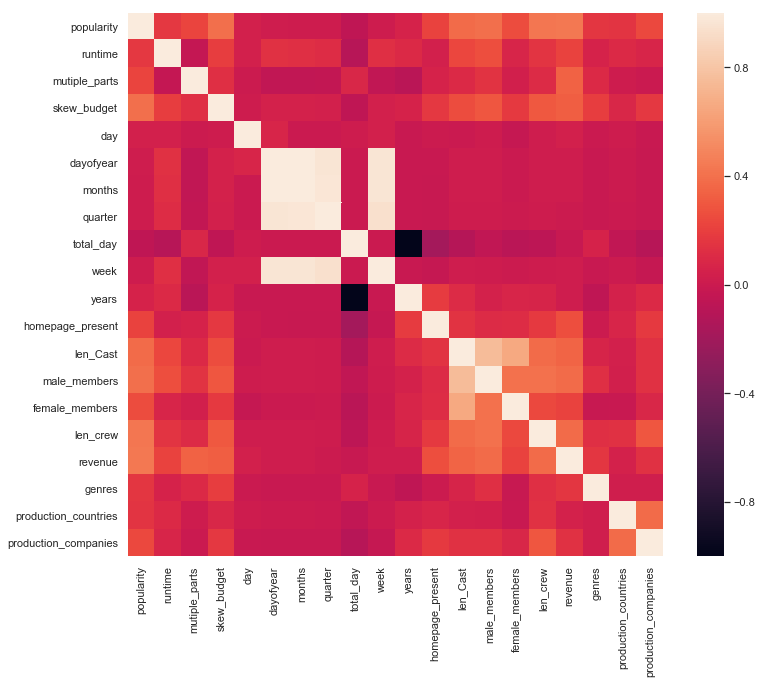

In [344]:
plt.figure(figsize=(12,10))
sns.heatmap(data_cor)

In [347]:
target_variable=train_data.drop(["day","dayofyear","months","quarter","total_day","week","years"],axis=1)

In [353]:
test_data_prep=test_data.drop(["day","dayofyear","months","quarter","total_day","week","years"],axis=1)